# Free-p cross-section ratio of $p(e,e'\pi^+)/p(e,e'\pi^+)$ 

$$\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)$$

last edit Aug-29, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load data

In [3]:
load_SIDIS_data( Nruns = -1, do_e_e_pi=False, do_e_e_pi_n=False , fdebug=0)

Done loading files.


## (2) Apply selection cuts not previously imposed

In [4]:
import time

In [5]:
print('number of pi+ events: %.1f'%(len(e_e_pi_FreeP['piplus'])/1e6),'M')

number of pi+ events: 0.4 M


In [6]:
Nevents = -1
t0= time.time()
_,_,e_e_pi_FreeP_pass_cuts,_ = apply_further_selection_cuts_to_data(fdebug=1, 
                                                            NeventsMax=Nevents,
                                                            NMaxPerSubset=500000);
t1 = time.time() 
print("Time elapsed: %.2f"%(t1 - t0), 'sec (%g us/event)'%((t1 - t0)/Nevents*1.e6)) # CPU seconds elapsed (floating point)

Applying selection cuts not previously imposed
(3) p(e,e'π) data
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 384081 events
Subdividing into 1 subsets up to 500000 events
Applying p-theta on cut for piminus on 117392 events
Subdividing into 1 subsets up to 500000 events
Apply a cut on the missing mass of a (e,e'π) reaction: 1.3<Mx<5.0 GeV/c2
p(e,e π+ )
384081 events after original cut (100.0 %)
284495 events after p-theta cut (74.1 %)
217859 events after Mx cut (56.7 %)
217621 events after Kinematical cut (56.7 %)
p(e,e π- )
117392 events after original cut (100.0 %)
113718 events after p-theta cut (96.9 %)
99251 events after Mx cut (84.5 %)
99138 events after Kinematical cut (84.5 %)
 
Done applying event-selection cuts
Time elapsed: 2.97 sec (-2.97097e+06 us/event)


## (3) Extract cross-section ratio as a function of Bjorken $x$
For a standing proton use $x_B$, defined as
$ x_B = Q^2/2m_p\omega$

In [7]:
z_bins   = np.arange(0.3,0.85,0.05)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.2,0.6,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f:'%(z_min,z_max))

x bins: [0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56 0.6 ]
z bins: [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]
0.290 < z < 0.310:
0.340 < z < 0.360:
0.390 < z < 0.410:
0.440 < z < 0.460:
0.490 < z < 0.510:
0.540 < z < 0.560:
0.590 < z < 0.610:
0.640 < z < 0.660:
0.690 < z < 0.710:
0.740 < z < 0.760:
0.790 < z < 0.810:


In [8]:
var_label = "standing proton x"
# var_label = "moving proton x"

if   var_label == "standing proton x":
    var    = 'xB'
    xlabel = "Bjorken $x$"
    
elif var_label == "moving proton x":
    var    = 'xPrime2'
    xlabel = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"    

# (4) Extract tabular data and save results to file

In [9]:
extract_SIDIS_ratio(df_dict  = e_e_pi_FreeP_pass_cuts,
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'FreeProton_SIDIS_ratio_',                           
                           suffix   = '')

saved /Users/erezcohen/Desktop/data/BAND/Results/FreeProton_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/FreeProton_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/FreeProton_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/FreeProton_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/FreeProton_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/FreeProton_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/FreeProton_SIDIS_ratio_Zmin0.590_Zmean_pips0.600_pims0.600_Zmax0.610.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/FreeProton_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660.csv
saved /Users/erezcohen/D

## load results and plot them

Reading files from /Users/erezcohen/Desktop/data/BAND/Results/
reading FreeProton_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560.csv
reading FreeProton_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410.csv
reading FreeProton_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310.csv
reading FreeProton_SIDIS_ratio_Zmin0.740_Zmean_pips0.750_pims0.750_Zmax0.760.csv
reading FreeProton_SIDIS_ratio_Zmin0.590_Zmean_pips0.600_pims0.600_Zmax0.610.csv
reading FreeProton_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360.csv
reading FreeProton_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510.csv
reading FreeProton_SIDIS_ratio_Zmin0.690_Zmean_pips0.700_pims0.700_Zmax0.710.csv
reading FreeProton_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660.csv
reading FreeProton_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460.csv
reading FreeProton_SIDIS_ratio_Zmin0.790_Zmean_pips0.799_pims0.800_Zmax0.810.csv
Done.


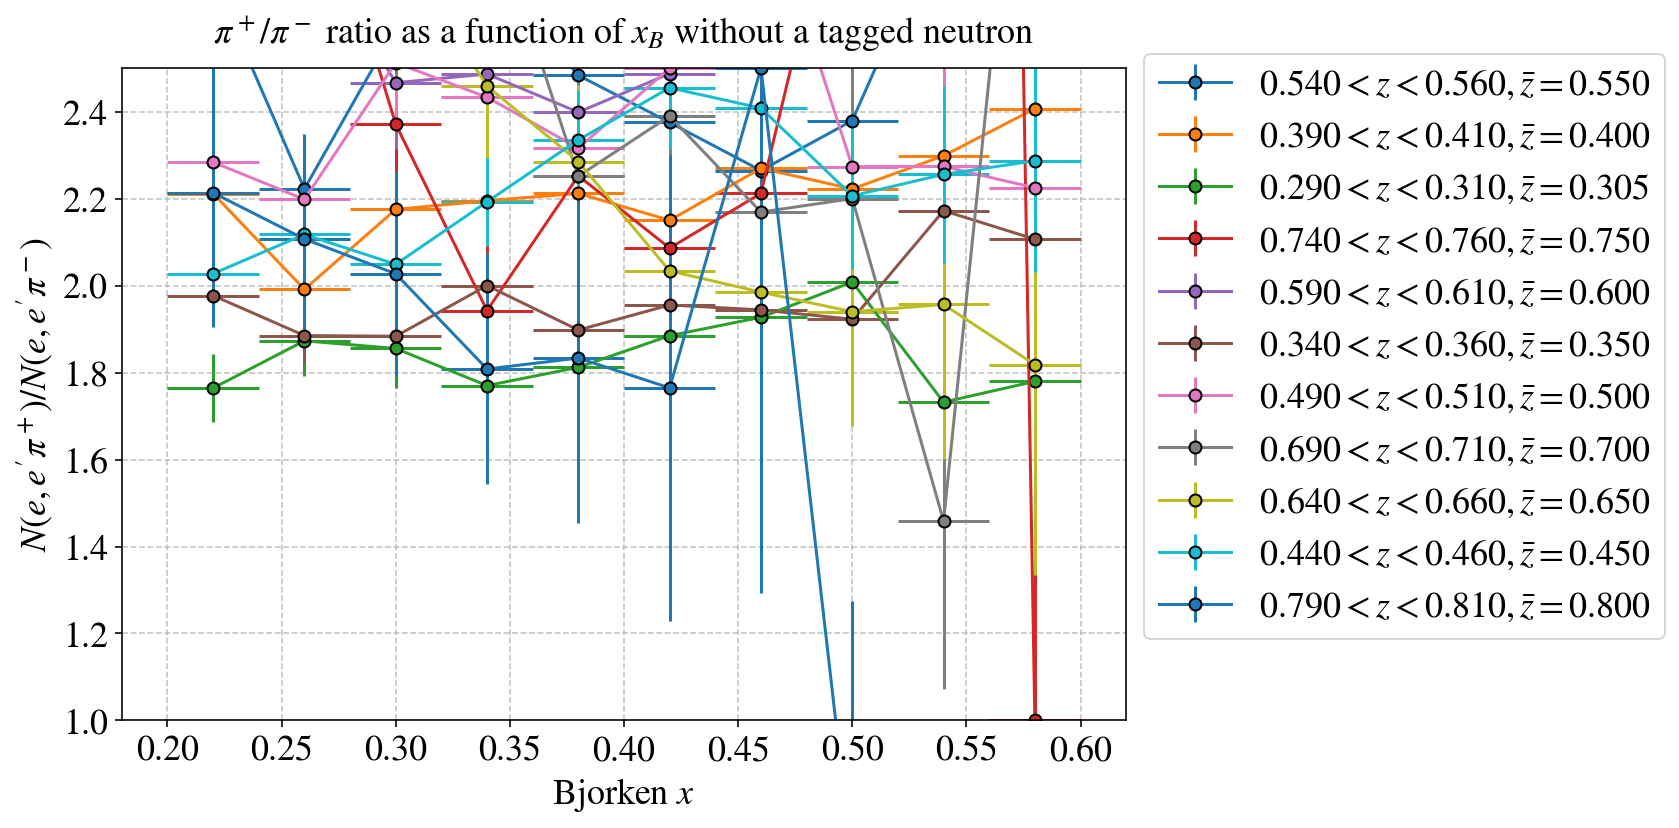

In [10]:
prefix = 'FreeProton_SIDIS_ratio_'
suffix = ''
SIDIS_results = load_SIDIS_ratio(prefix = prefix, suffix = suffix, doPlotResults=True)
ax = plt.gca()
ax.set_ylim(1,2.5);

# (5) Extract modified results
With no acceptance matching cut in $p-\theta$ plane

## (5.1) Results in different bins of M_x

In [11]:
M_x_min_arr = [0.5,1.0,1.5,2.0,2.5]
M_x_max_arr = [1.0,1.5,2.0,2.5,3.0]

In [12]:
for M_x_min,M_x_max in zip(M_x_min_arr,M_x_max_arr):
    print(M_x_min,M_x_max)
    extract_SIDIS_ratio(df_dict  = e_e_pi_FreeP_pass_cuts,
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/',
                        prefix   = 'FreeProton_SIDIS_ratio_',                    
                        suffix   = '_Mx_%.2f-%.2f_GeV'%(M_x_min,M_x_max),
                        M_x_min  = M_x_min,
                        M_x_max  = M_x_max)
    
print('done.')

0.5 1.0
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.290_Zmean_pipsnan_pimsnan_Zmax0.310_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.340_Zmean_pipsnan_pimsnan_Zmax0.360_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.390_Zmean_pipsnan_pimsnan_Zmax0.410_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.440_Zmean_pipsnan_pimsnan_Zmax0.460_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.490_Zmean_pipsnan_pimsnan_Zmax0.510_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.540_Zmean_pipsnan_pimsnan_Zmax0.560_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.590_Zmean_pipsnan_pimsnan_Zmax0.610_Mx_0.50-1.00

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:187: RuntimeWarning: invalid value encountered in true_divide
  ret = arr.dtype.type(ret / rcount)


saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460_Mx_1.00-1.50_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510_Mx_1.00-1.50_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560_Mx_1.00-1.50_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.590_Zmean_pips0.600_pims0.600_Zmax0.610_Mx_1.00-1.50_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660_Mx_1.00-1.50_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.690_Zmean_pips0.700_pims0.701_Zmax0.710_Mx_1.00-1.50_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/FreeProton_SIDIS_ratio_Zmin0.740_Zmean_pips0.750_pims0.750_Zm

## (5.2) extract results for many more bins in $z$

In [13]:
# z_bins   = np.arange(0.3,0.8,0.01)
# z_widths = 0.001*np.ones(len(z_bins))

# prefix = 'FreeProton_SIDIS_ratio_'
# suffix = ''

In [14]:
# extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,                                
#                            x_var    = var ,                           
#                            x_bins   = x_bins,                           
#                            z_bins   = z_bins,                           
#                            z_widths = z_widths,                           
#                            fdebug   = 0,
#                            prefix   = 'FreeProton_SIDIS_ratio_',                           
#                            suffix   = '')

In [15]:
# SIDIS_results = load_SIDIS_ratio_DataFrame(z_bins=z_bins,z_widths=z_widths,
#                                            prefix = prefix, suffix = suffix, 
#                                            doPlotResults=True)

# arxiv